In [372]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [373]:
df = pd.read_csv("date_inghetata.csv")
df

,temperatura,vanzari,luna,zi_saptamana
0,8,25,ianuarie,luni
1,10,35,ianuarie,marti
2,12,45,ianuarie,miercuri
3,15,55,ianuarie,joi
4,18,75,ianuarie,vineri
...,...,...,...,...
233,33,168,mai,miercuri
234,35,182,mai,joi
235,37,195,mai,vineri
236,39,208,mai,sambata


In [374]:
df.dtypes

temperatura      int64
vanzari          int64
luna            object
zi_saptamana    object
dtype: object

In [375]:
df.describe()

,temperatura,vanzari
count,238.000000,238.000000
mean,28.731092,147.663866
std,8.713148,64.122809
min,8.000000,25.000000
25%,22.000000,95.000000
50%,29.000000,142.000000
75%,36.000000,195.000000
max,45.000000,288.000000


In [376]:
x, y = df[["temperatura"]], df[["vanzari"]]

In [377]:
type(df["temperatura"])

pandas.core.series.Series

In [378]:
type(df[["temperatura"]])

pandas.core.frame.DataFrame

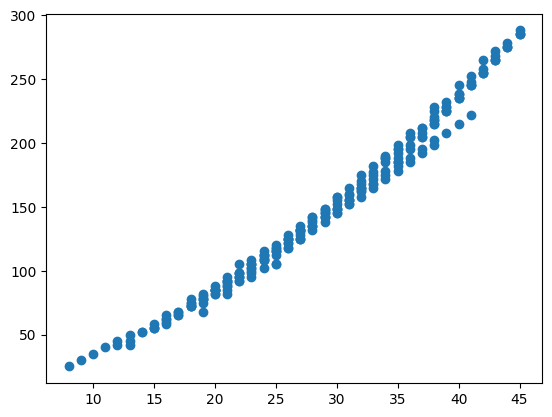

In [379]:
plt.scatter(x, y);

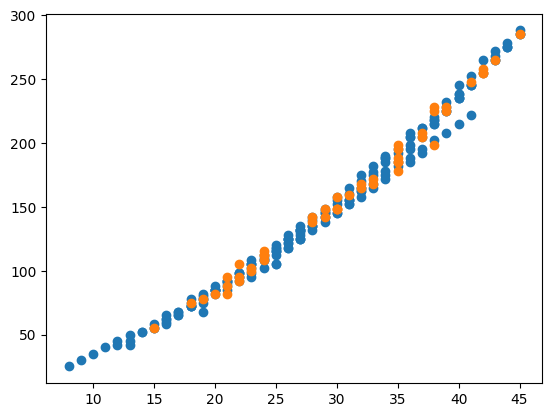

In [380]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
plt.scatter(x_train, y_train);
plt.scatter(x_test, y_test);

In [381]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


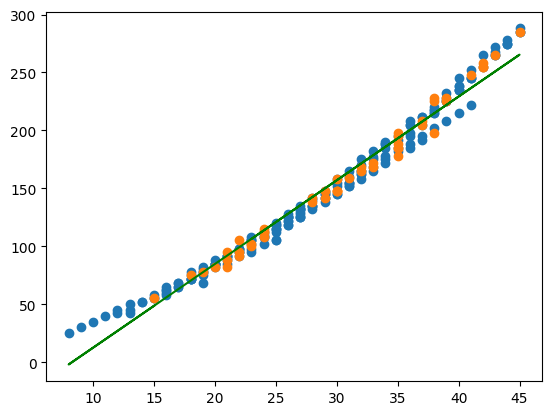

In [382]:
plt.scatter(x_train, y_train);
plt.scatter(x_test, y_test);

plt.plot(x_train, linear_model.coef_ * x_train + linear_model.intercept_, c="green");


In [383]:
linear_model.score(x_test, y_test)

0.9811087599601578

In [384]:
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [385]:
knn_model.score(x_test, y_test)

0.9906223021152613

In [386]:
from sklearn.model_selection import GridSearchCV

In [387]:
grid_model = GridSearchCV(estimator=KNeighborsRegressor(), param_grid={
    'n_neighbors' : list(range(1, 11)),
})

grid_model

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,5


In [388]:
grid_model.estimator

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [389]:
grid_model.estimator.n_neighbors

5

In [390]:
grid_model.param_grid

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [391]:
grid_model.fit(x_train, y_train)

,estimator,KNeighborsRegressor()
,param_grid,"{'n_neighbors': [1, 2, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [392]:
grid_model.best_estimator_

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [393]:
grid_model.score(x_test, y_test)

0.9896110263022587

In [394]:
score_df  = pd.DataFrame(grid_model.cv_results_)
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000723,0.000229,0.000773,0.000240,1,{'n_neighbors': 1},0.983838,0.987819,0.987772,0.989285,0.984764,0.986696,0.002050,10
1,0.000490,0.000014,0.000590,0.000060,2,{'n_neighbors': 2},0.989538,0.987118,0.987428,0.990891,0.988078,0.988611,0.001412,8
2,0.000583,0.000071,0.000707,0.000135,3,{'n_neighbors': 3},0.990279,0.988914,0.989941,0.992213,0.988896,0.990049,0.001213,1
3,0.000607,0.000097,0.000659,0.000085,4,{'n_neighbors': 4},0.990652,0.987884,0.990318,0.990510,0.987898,0.989452,0.001279,3
4,0.000551,0.000066,0.000609,0.000035,5,{'n_neighbors': 5},0.990936,0.989534,0.991265,0.991042,0.986740,0.989904,0.001695,2
5,0.000568,0.000077,0.000607,0.000061,6,{'n_neighbors': 6},0.990562,0.989600,0.990281,0.991194,0.985622,0.989452,0.001982,4
6,0.000527,0.000078,0.000591,0.000055,7,{'n_neighbors': 7},0.990114,0.989080,0.990482,0.992091,0.985267,0.989407,0.002285,5
7,0.000509,0.000064,0.000624,0.000092,8,{'n_neighbors': 8},0.989692,0.988915,0.988681,0.991825,0.986484,0.989119,0.001722,6
8,0.000538,0.000034,0.000640,0.000078,9,{'n_neighbors': 9},0.986723,0.988104,0.989777,0.992102,0.987893,0.988920,0.001866,7
9,0.000545,0.000072,0.000596,0.000039,10,{'n_neighbors': 10},0.985335,0.987391,0.987348,0.991896,0.989447,0.988283,0.002226,9


In [395]:
score_df.sort_values("rank_test_score")[["rank_test_score", "param_n_neighbors", "mean_test_score"]]

,rank_test_score,param_n_neighbors,mean_test_score
2,1,3,0.990049
4,2,5,0.989904
3,3,4,0.989452
5,4,6,0.989452
6,5,7,0.989407
7,6,8,0.989119
8,7,9,0.988920
1,8,2,0.988611
9,9,10,0.988283
0,10,1,0.986696


<BarContainer object of 10 artists>

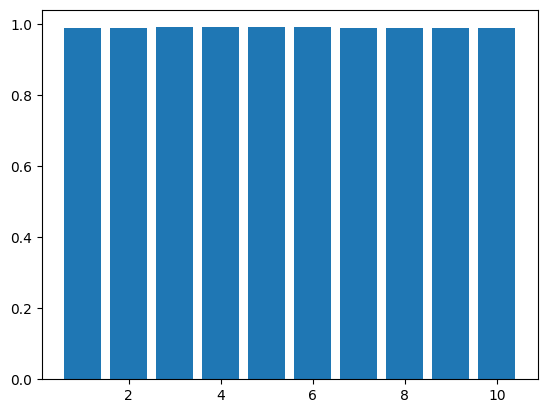

In [396]:
plt.bar(x=score_df.param_n_neighbors, height=score_df.mean_test_score)

<Axes: xlabel='param_n_neighbors'>

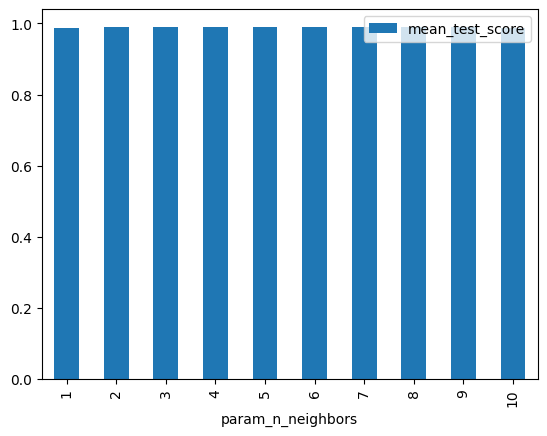

In [399]:
# plt.bar(x=score_df.param_n_neighbors, height=score_df.mean_test_score)

score_df.plot.bar( x="param_n_neighbors",y="mean_test_score")